## MACD

1. **MACD곡선** : 12일 지수이평선 - 26일 지수이평선
2. **MACD시그널** : MACD곡선의 9일 지수이평선
3. **MACD히스토그램** : MACD곡선 - MACD시그널

In [1]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import json

In [2]:
stock2code = json.load(open('../data/stock2code.json', 'r'))
df = fdr.DataReader(stock2code['빅텍'], '2018')

ewm12w = df.Close.ewm(span=60).mean()   #12주 이평선
ewm26w = df.Close.ewm(span=130).mean() #26주 이평선
macdline = ewm12w - ewm26w  #macd곡선
macdsign = macdline.ewm(span=45).mean()  #macd시그널
macdhist = macdline - macdsign  #macd히스토그램

In [3]:
ewm12w

Date
2018-01-02    3765.000000
2018-01-03    3792.958333
2018-01-04    3795.384224
2018-01-05    3796.596495
2018-01-08    3775.968145
                 ...     
2022-04-11    6658.214243
2022-04-12    6674.010497
2022-04-13    6692.239661
2022-04-14    6712.494098
2022-04-15    6726.182817
Name: Close, Length: 1056, dtype: float64

In [4]:
macdline

Date
2018-01-02      0.000000
2018-01-03      0.246795
2018-01-04      0.205726
2018-01-05      0.184664
2018-01-08     -0.563488
                 ...    
2022-04-11    293.260438
2022-04-12    297.223925
2022-04-13    302.426928
2022-04-14    308.632704
2022-04-15    311.235335
Name: Close, Length: 1056, dtype: float64

### matplotlib으로 MACD 시각화

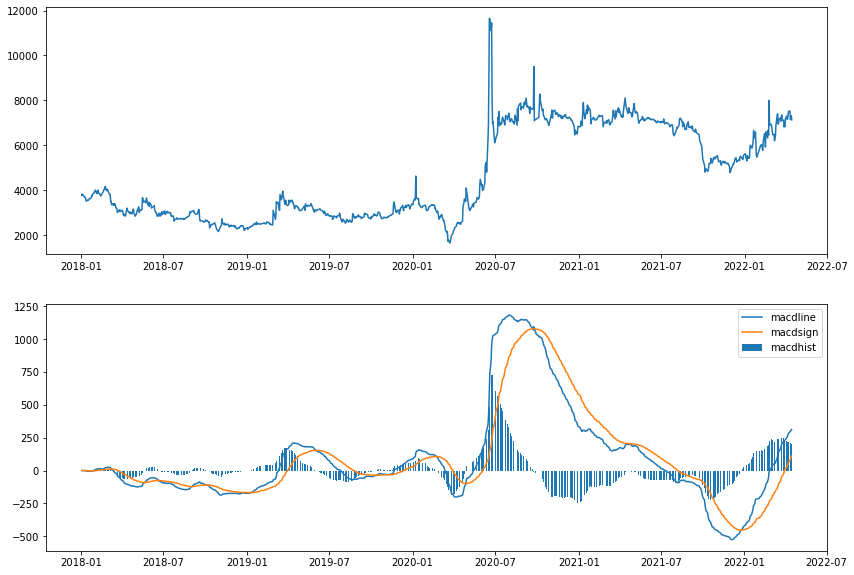

In [5]:
plt.figure(figsize=(14,10))

plt.subplot(2,1,1)
plt.plot(df.Close)

plt.subplot(2,1,2)
plt.plot(macdline, label='macdline')
plt.plot(macdsign, label='macdsign')
plt.bar(macdhist.index, macdhist, label='macdhist')
plt.legend()
plt.show()

### plotly로 MACD시각화

In [6]:
total_df = pd.concat([df, ewm12w, ewm26w, macdline, macdsign, macdhist], axis=1).dropna()
total_df.columns = df.columns.tolist() + ['EWM12W','EWM26W','MACDLINE','MACDSIGN','MACDHIST']
total_df.tail()

,Open,High,Low,Close,Volume,Change,EWM12W,EWM26W,MACDLINE,MACDSIGN,MACDHIST
Date,,,,,,,,,,,
2022-04-11,7440,7590,7430,7520,2238079,0.001332,6658.214243,6364.953805,293.260438,72.785365,220.475073
2022-04-12,7490,7500,7040,7140,3055513,-0.050532,6674.010497,6376.786572,297.223925,82.543563,214.680362
2022-04-13,7120,7280,7110,7230,1290782,0.012605,6692.239661,6389.812733,302.426928,92.103709,210.323219
2022-04-14,7200,7410,7160,7310,1801606,0.011065,6712.494098,6403.861395,308.632704,101.518013,207.114690
2022-04-15,7200,7230,7110,7130,1460084,-0.024624,6726.182817,6414.947481,311.235335,110.636158,200.599177


In [7]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [8]:
import cufflinks as cf
from plotly.offline import iplot
cf.go_offline(connected=True)

qplot = cf.QuantFig(total_df, title='MACD', legend='top', name='MACD')

In [9]:
qplot.add_ema(periods=130, column='Close', color='red')
qplot.add_volume(column='MACDHIST', name='MACD-HIST')
qplot.add_macd(60, 130, 45)
qplot.iplot()

## 볼린저밴드

In [10]:
df = fdr.DataReader(stock2code['삼성에스디에스'], '2019')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,205000,211000,204500,206000,99070,0.009804
2019-01-03,206000,211000,204500,205000,89678,-0.004854
2019-01-04,204000,207500,201000,204500,77416,-0.002439
2019-01-07,207500,208000,203000,205000,79470,0.002445
2019-01-08,207500,207500,202500,202500,53572,-0.012195
...,...,...,...,...,...,...
2022-04-11,136500,137500,135500,136500,83281,-0.003650
2022-04-12,135000,136500,134500,136000,123060,-0.003663
2022-04-13,136000,139000,135500,138000,114021,0.014706


In [11]:
df['MA20'] = df.Close.rolling(window=20).mean() # 20일 이평선
df['STD'] = df.Close.rolling(window=20).std()   # 20일 이동표준편차
df['UB'] = df.MA20 + df.STD * 2    # upper band
df['LB'] = df.MA20 - df.STD * 2    # lower band
df.dropna(inplace=True)
df

,Open,High,Low,Close,Volume,Change,MA20,STD,UB,LB
Date,,,,,,,,,,
2019-01-29,218500,223500,218500,223000,81687,0.011338,212600.0,6079.733374,224759.466747,200440.533253
2019-01-30,223000,223500,219000,221000,89929,-0.008969,213350.0,6147.528387,225645.056773,201054.943227
2019-01-31,224000,224500,220500,223500,93229,0.011312,214275.0,6216.436193,226707.872387,201842.127613
2019-02-01,222000,225000,221500,222500,76074,-0.004474,215175.0,6026.858744,227228.717487,203121.282513
2019-02-07,223500,225000,219500,222500,76399,0.000000,216050.0,5735.163926,227520.327853,204579.672147
...,...,...,...,...,...,...,...,...,...,...
2022-04-11,136500,137500,135500,136500,83281,-0.003650,136575.0,3555.111220,143685.222441,129464.777559
2022-04-12,135000,136500,134500,136000,123060,-0.003663,136500.0,3550.389156,143600.778312,129399.221688
2022-04-13,136000,139000,135500,138000,114021,0.014706,136400.0,3473.963306,143347.926612,129452.073388


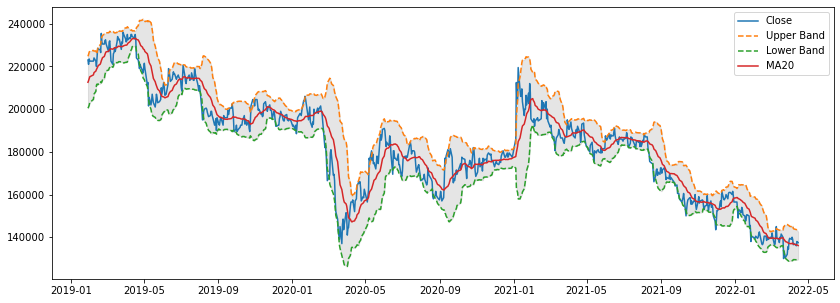

In [12]:
plt.figure(figsize=(14,5))
plt.plot(df.index, df.Close, label='Close')
plt.plot(df.index, df.UB, linestyle='--', label='Upper Band')
plt.plot(df.index, df.LB, linestyle='--', label='Lower Band')
plt.plot(df.index, df.MA20, label='MA20')
plt.fill_between(df.index, df.UB, df.LB, color='grey', alpha=0.2)
plt.legend()
plt.show()